In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier

In [101]:
test = pd.read_csv("kidney_disease_test.csv")
data = pd.read_csv("kidney_disease_train.csv")
data = data.replace(to_replace =["normal", "abnormal","notpresent","present","no","yes","poor","good","ckd","notckd"], value =[0,1,0,1,0,1,0,1,0,1])
data_mean = data
data_median = data
data_mode = data
data_constant = data
data_interactiv = data
data_knn = data

### Am creat mai multe variabile pentru dataseturi, pentru a cerceta fiecare metoda de input


In [245]:
data_mean.head(10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,157.0,62.0,70.0,1.025000,3.00000,0.000000,0.00000,1.000000,0.0,0.0,...,39.000000,7900.000000,3.900000,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1,109.0,54.0,70.0,1.017439,1.02449,0.438017,0.16763,0.213043,0.0,0.0,...,39.165939,8354.950495,4.706452,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,17.0,47.0,80.0,1.017439,1.02449,0.438017,0.16763,0.213043,0.0,0.0,...,39.165939,8354.950495,4.706452,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,347.0,43.0,60.0,1.025000,0.00000,0.000000,0.00000,0.000000,0.0,0.0,...,43.000000,7200.000000,5.500000,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,24.0,42.0,100.0,1.015000,4.00000,0.000000,0.00000,1.000000,0.0,1.0,...,39.000000,8300.000000,4.600000,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,175.0,60.0,50.0,1.010000,0.00000,0.000000,0.16763,0.000000,0.0,0.0,...,39.165939,4200.000000,3.400000,1.0,0.0,0.0,1.0,0.0,0.0,0.0
6,351.0,29.0,80.0,1.020000,0.00000,0.000000,0.00000,0.000000,0.0,0.0,...,40.000000,9900.000000,4.700000,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7,332.0,34.0,70.0,1.025000,0.00000,0.000000,0.00000,0.000000,0.0,0.0,...,44.000000,10500.000000,6.100000,0.0,0.0,0.0,1.0,0.0,0.0,1.0
8,167.0,34.0,70.0,1.020000,0.00000,0.000000,1.00000,0.000000,0.0,0.0,...,42.000000,2200.000000,4.706452,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,245.0,48.0,100.0,1.017439,1.02449,0.438017,0.16763,0.213043,0.0,0.0,...,19.000000,7200.000000,2.600000,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [108]:
data.select_dtypes(include=['object'])
#data = data.astype(float)
data['wc'] = pd.to_numeric(data['wc'], errors='coerce')
data['cad'] = pd.to_numeric(data[''], errors='coerce')

Unele coloane dupa modificare au ramas de tip object,si am folosit to_numeric

In [111]:
data.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc               float64
pc                float64
pcc               float64
ba                float64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn               float64
dm                float64
cad               float64
appet               int64
pe                  int64
ane                 int64
classification      int64
dtype: object

In [112]:
data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [113]:
data_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              280 non-null    int64  
 1   age             275 non-null    float64
 2   bp              271 non-null    float64
 3   sg              244 non-null    float64
 4   al              245 non-null    float64
 5   su              242 non-null    float64
 6   rbc             173 non-null    float64
 7   pc              230 non-null    float64
 8   pcc             276 non-null    float64
 9   ba              276 non-null    float64
 10  bgr             247 non-null    float64
 11  bu              266 non-null    float64
 12  sc              268 non-null    float64
 13  sod             213 non-null    float64
 14  pot             212 non-null    float64
 15  hemo            241 non-null    float64
 16  pcv             229 non-null    float64
 17  wc              202 non-null    flo

In [114]:
print(" \nCount total NaN at each column in a DataFrame : \n\n",
      data_mean.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 id                  0
age                 5
bp                  9
sg                 36
al                 35
su                 38
rbc               107
pc                 50
pcc                 4
ba                  4
bgr                33
bu                 14
sc                 12
sod                67
pot                68
hemo               39
pcv                51
wc                 78
rc                 94
htn                 1
dm                  6
cad                 3
appet               0
pe                  0
ane                 0
classification      0
dtype: int64


### Multe date lipsesc

In [3]:
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
mean_imp = SimpleImputer(missing_values=np.nan, strategy='mean')
median_imp = SimpleImputer(missing_values=np.nan, strategy='median')
mode_imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
const_imp = SimpleImputer(missing_values=np.nan, strategy='constant',fill_value = 0)
imp_mean = IterativeImputer(random_state=0)
knn_imp = KNNImputer(n_neighbors=3) #mean de la vecinii cu 3 pozitii departare

In [116]:
data_knn = pd.DataFrame(knn_imp.fit_transform(data_knn),columns = data_knn.columns)

In [117]:
data_mean =pd.DataFrame(mean_imp.fit_transform(data_mean),columns = data_mean.columns)

In [118]:
data_median =pd.DataFrame(median_imp.fit_transform(data_median),columns = data_median.columns)

In [119]:
data_mode =pd.DataFrame(mode_imp.fit_transform(data_mode),columns = data_mode.columns)

In [120]:
data_constant =pd.DataFrame(const_imp.fit_transform(data_constant),columns = data_constant.columns)

In [121]:
data_interactiv =pd.DataFrame(imp_mean.fit_transform(data_interactiv),columns = data_interactiv.columns)

In [130]:
data_mean.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

### Observam ca toate valorile care lipsesc au fost substituite


## SimpleInputer MEAN

[0.00938441 0.0110584  0.1528546  0.08121916 0.01415105 0.11972303
 0.03960934 0.00464661 0.00184146 0.02199654 0.01924602 0.01050698
 0.01289628 0.00545784 0.07199158 0.06238863 0.00592188 0.03613181
 0.13138261 0.10331658 0.00230198 0.04426023 0.02643785 0.01127509]


<AxesSubplot:>

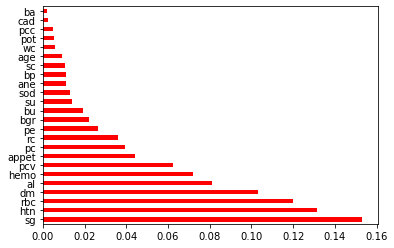

In [237]:
from sklearn import preprocessing
from sklearn import utils


X_mean = data_mean.iloc[:,1:25]  
y_mean = data_mean.iloc[:,-1]  
lab = preprocessing.LabelEncoder()
y_mean = lab.fit_transform(y_mean)

model = ExtraTreesClassifier()
model.fit(X_mean,y_mean)
print(model.feature_importances_) 
feature_cols = pd.Series(model.feature_importances_, index=X_mean.columns)
feature_cols.nlargest(len(data.columns)).plot(kind='barh', color = 'red')
#plt.show()

### Observam ca cea mai mare corelatie le au coloanele Hemo si pcv
Incepem antrenarea modelellor

In [238]:
y = data_mean['classification']
X = data_mean.drop(['classification','ba','cad','pcc','pc','su','pot','wc','age','bu','bp','bgr'],axis=1)

In [239]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_data, y_data = X, y
X, X_test, y, y_test = train_test_split(X_data, y_data, test_size = 0.3, stratify=y_data, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3, stratify=y, random_state=0)

In [240]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [242]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_acc_score = accuracy_score(y_test, lr_predict)
print(f"simpleImputer mean strategy accuracy : {lr_acc_score*100}%")

simpleImputer mean strategy accuracy : 100.0%


## SimpleInputer median

[0.01062199 0.01230045 0.16239939 0.08035807 0.01363046 0.01239754
 0.01974998 0.00705754 0.002016   0.0258593  0.0187711  0.02387498
 0.01629137 0.0068694  0.08197674 0.06757084 0.00514175 0.03262121
 0.16890221 0.12392473 0.00244763 0.06001182 0.03256677 0.01263874]


<AxesSubplot:>

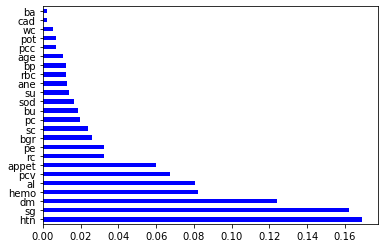

In [197]:
X_median = data_median.iloc[:,1:25]  
y_median = data_median.iloc[:,-1]  
lab = preprocessing.LabelEncoder()
y_median = lab.fit_transform(y_median)

model = ExtraTreesClassifier()
model.fit(X_median,y_median)
print(model.feature_importances_) 
feature_cols = pd.Series(model.feature_importances_, index=X_mean.columns)
feature_cols.nlargest(len(data.columns)).plot(kind='barh', color = 'blue')

#### Putem observa ca in comparate cu strategia "mean"  cea mediana are un contrast mai mare intre corelatii, unde cele primele corelatii din al-2-lea grafic au valori mai mici fata de primul grafic,iar ultima corelatie ajunge la 0.16, in comparatie cu aprox 0,14 in primul grafic, reiesind din acest grafic vom folosi mai putine date cu corelatie mai mare,in comparatie cu metoda precedenta.


In [198]:
y_median = data_median['classification']
X_median = data_median.drop(['classification','ba','cad','pcc','su','pot','wc','age','bu','bp','bgr','sc','sod','pe','rbc','rc',''],axis=1)

In [214]:
X_data, y_data = X_median, y_median
X, X_test, y, y_test = train_test_split(X_data, y_data, test_size = 0.3, stratify=y_data, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3, stratify=y, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
lr = LogisticRegression()

model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_acc_score = accuracy_score(y_test, lr_predict)
print(f"simpleImputer median strategy accuracy : {lr_acc_score*100}%")

simpleImputer median strategy accuracy : 100.0%


In [179]:
len(data.columns)

26

## Simple Imputer mode

[0.0113271  0.01881351 0.18181318 0.08087721 0.00750584 0.0118742
 0.02672742 0.0068198  0.00148589 0.02287633 0.00941578 0.03003483
 0.02168226 0.00656    0.06305576 0.05076109 0.00521519 0.05888563
 0.15268197 0.11994052 0.00321646 0.06176752 0.03237661 0.01428592]


<AxesSubplot:>

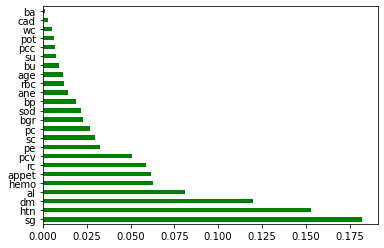

In [196]:
X_mode = data_mode.iloc[:,1:25]  
y_mode = data_mode.iloc[:,-1]  
lab = preprocessing.LabelEncoder()
y_mode = lab.fit_transform(y_mode)

model = ExtraTreesClassifier()
model.fit(X_mode,y_mode)
print(model.feature_importances_) 
feature_cols = pd.Series(model.feature_importances_, index=X_mean.columns)
feature_cols.nlargest(len(data.columns)).plot(kind='barh', color = 'green')

#### Aici putem observa diferente mai putine coloane cu corelatii mari

In [184]:
y = data_mode['classification']
X = data_mode.drop(['classification','ba','cad','pcc','su','pot','wc','age','bu','bp','bgr','sc','sod','ane','pe'],axis=1)

In [187]:
X_data, y_data = X, y
X, X_test, y, y_test = train_test_split(X_data, y_data, test_size = 0.3, stratify=y_data, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3, stratify=y, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
lr = LogisticRegression()

model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_acc_score = accuracy_score(y_test, lr_predict)
print(f"simpleImputer mode strategy accuracy : {lr_acc_score*100}%")

simpleImputer mode strategy accuracy : 92.85714285714286%


#### Putem observa ca acuratetia este mai mica

[0.01283743 0.00884862 0.02638886 0.09675341 0.00997561 0.01422746
 0.03325201 0.00470825 0.00159497 0.01516818 0.0191848  0.03362509
 0.05605672 0.02353335 0.06504114 0.06782418 0.02074863 0.11724778
 0.14509164 0.14309668 0.00222029 0.04461016 0.0256544  0.01231035]


<AxesSubplot:>

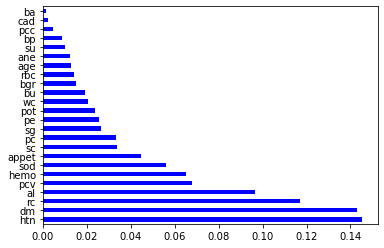

In [195]:
X_constant = data_constant.iloc[:,1:25]  
y_constant = data_constant.iloc[:,-1]  
lab = preprocessing.LabelEncoder()
y_constant = lab.fit_transform(y_constant)

model = ExtraTreesClassifier()
model.fit(X_constant,y_constant)
print(model.feature_importances_) 
feature_cols = pd.Series(model.feature_importances_, index=X_mean.columns)
feature_cols.nlargest(len(data.columns)).plot(kind='barh', color = 'blue')

In [218]:
y = data_constant['classification']
X = data_constant.drop(['classification','ba','cad','pcc','su','pot','wc','age','bu','bp','bgr','sc','sod','ane','pe','rbc','sg'],axis=1)

In [219]:
X_data, y_data = X, y
X, X_test, y, y_test = train_test_split(X_data, y_data, test_size = 0.3, stratify=y_data, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3, stratify=y, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
lr = LogisticRegression()

model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_acc_score = accuracy_score(y_test, lr_predict)
print(f"simpleImputer constant strategy accuracy : {lr_acc_score*100}%")

simpleImputer constant strategy accuracy : 98.80952380952381%


[0.00351964 0.00907144 0.16291643 0.07206038 0.01206612 0.13641896
 0.04778102 0.00491133 0.00181624 0.01889809 0.0091547  0.01212276
 0.00721662 0.00274662 0.09382864 0.09113529 0.00398521 0.03494377
 0.08846629 0.10727019 0.00144688 0.04330454 0.02441882 0.01050002]


<AxesSubplot:>

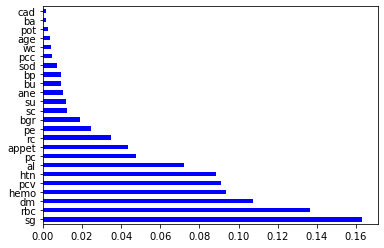

In [217]:
X_interactiv = data_interactiv.iloc[:,1:25]  
y_interactiv = data_interactiv.iloc[:,-1]  
lab = preprocessing.LabelEncoder()
y_interactiv = lab.fit_transform(y_interactiv)

model = ExtraTreesClassifier()
model.fit(X_interactiv,y_interactiv)
print(model.feature_importances_) 
feature_cols = pd.Series(model.feature_importances_, index=X_mean.columns)
feature_cols.nlargest(len(data.columns)).plot(kind='barh', color = 'blue')

#### Putem observa o diferenta mare intre unele corelatii, careva fiind aproape nesemnificative

In [224]:
y = data_interactiv['classification']
X = data_interactiv.drop(['classification','ba','cad','pcc','su','pot','wc','age','bu','bp','bgr','sc','sod','ane','pe','rbc','sg','pc','appet'],axis=1)

In [229]:
X_data, y_data = X, y
X, X_test, y, y_test = train_test_split(X_data, y_data, test_size = 0.3, stratify=y_data, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3, stratify=y, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
lr = LogisticRegression()

model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_acc_score = accuracy_score(y_test, lr_predict)
print(f" interactiv inputer accuracy : {lr_acc_score*100}%")

 interactiv inputer accuracy : 96.55172413793103%


[0.00368034 0.00953624 0.11596613 0.11331945 0.01398707 0.16439034
 0.04041397 0.00322265 0.00151301 0.02822944 0.00914824 0.02233942
 0.0085824  0.00218371 0.05829474 0.08098108 0.00316858 0.03641093
 0.13263219 0.08363603 0.00153534 0.03048825 0.03168023 0.00466021]


<AxesSubplot:>

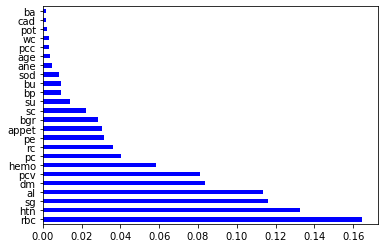

In [230]:
X_knn = data_knn.iloc[:,1:25]  
y_knn= data_knn.iloc[:,-1]  
lab = preprocessing.LabelEncoder()
y_knn = lab.fit_transform(y_knn)

model = ExtraTreesClassifier()
model.fit(X_knn,y_knn)
print(model.feature_importances_) 
feature_cols = pd.Series(model.feature_importances_, index=X_mean.columns)
feature_cols.nlargest(len(data.columns)).plot(kind='barh', color = 'blue')

### Putem folosi mai putine coloane pentru antrenare, deoarece o mare parte din ele au o corelatie mica,ceea ce ne indica ca nu influenteaza mult antrenarea, iar timpul de afectuare a antrenarii este mai mic

In [231]:
y_knn = data_knn['classification']
X_knn = data_knn.drop(['classification','ba','cad','pcc','su','pot','wc','age','bu','bp','bgr','sc','sod','ane','pe','rbc','sg','pc','appet','rc'],axis=1)

In [243]:
X_data, y_data = X_knn, y_knn
X, X_test, y, y_test = train_test_split(X_data, y_data, test_size = 0.3, stratify=y_data, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3, stratify=y, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
lr = LogisticRegression()

model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_acc_score = accuracy_score(y_test, lr_predict)
print(f" knn inputer accuracy : {lr_acc_score*100}%")

 knn inputer accuracy : 100.0%


## In urma efectuarii aceste sarcini, m-am familiarizat cu diferite tipuri de inputeri,care sunt folosite pentru a inlocui valorile lipsa din dataseturi, am folosit SimpleImputer,prin 4 strategii: mean,mode,median,constant, inputer interactiv, si inputer knn, care are ca principiu de selectare a mediei intre un anumit numar de vecini. Iar in urma antrenarii, cele mai bune acurateti, au prezentat SimpleInputer cu strategia 'mean' si knn inputerul